# Topic: **Sparsely Learned Random Walker**

# *Abstract*

Seeded image segmentation is crucial for computer vision, yet sparse annotations pose challenges. In our "Sparse Random Walker" approach, inspired by the principles of [Cerrone et al.](https://doi.org/10.48550/arXiv.1905.09045), we dynamically split annotated pixels into propagation and loss nodes, iterating through split-propagate-loss cycles. This allows for effective model training with limited annotations. Leveraging sparse masks enhances computational efficiency during both training and inference. Our method, integrated into a U-Net architecture, akin to [Cerrone et al.](https://doi.org/10.48550/arXiv.1905.09045), employs a CNN to predict edge weights for the Random Walker algorithm on the underlying graph.

# *Team Members and Contributions*



*   **Sonal Bihani**, sbihani@uwaterloo.ca (Student ID: 21032559)
    * Documentation
    * Dataloader
    * Model Training Loop  
*   **Pedro Ferraz**, pmaiades@uwaterloo.ca (Student ID: 21022845)
    * UNet component
    * Inductive Experiments
    * Documentation
*   **Callum Takasaka**, cttakasa@uwaterloo.ca (Student ID: 21000024)
    * Dataloader
    * Transductive Experiments
    * Documentation



# *Code Libraries*
## *External Code Libraries*
### Necessary Python libraries are listed below. Note that this project is built on Python 3.10+

*   pytorch==2.1.1
    *    Neural Network framework
*   h5py==3.9.0
    *    Reading in HDF5 files (segmentation data)
*   xxhash==3.4.1
    *    Hashing ndarrays, for consistent mask generation

A yaml file (`cs684_slrw.yml`) is provided which will initialize a working Conda environment.

Use command, `conda env create -f cs684_slrw.yml`.

xxhash will still need to be installed via pip, if this env is used (conda stores an outdated version).

The code uses the randomwalker library from [Cerrone et al.](https://doi.org/10.48550/arXiv.1905.09045), available on GitHub [here](https://github.com/hci-unihd/pytorch-LearnedRandomWalker).

## *Our Code Libraries*

We utilize the following directories to organize scripts:
| Directory/Script Name               | Description                                                        | 
|------------------------|--------------------------------------------------------------------|
| `data`       | Contains scripts for creating the dataloader and generating sparse masks for ground truth images                           |
| `utils`                 |  Contains scripts for calculating metrics like mIoU, setting seeds and other functions for creating the final notebook                                  |
| `unet`       |Contains scripts for the U-net architecture | 
| `transductive_experiment.py`          | Script for running transductive experiments                            |
| `train.py`       | Script for training the model for running inductive experiments |                       




# *Introduction*
Image segmentation is a critical aspect of computer vision, allowing machines to interpret visual data. Seeded image segmentation provides a means to guide this process using annotated pixels as markers. However, obtaining extensive annotations is often expensive or impractical. In response, our project introduces the "Sparse Random Walker" approach, addressing the challenge of training segmentation models with limited ground truth annotations.

In the paper by [Cerrone et al.](https://doi.org/10.48550/arXiv.1905.09045), a new method for seeded image segmentation is introduced, focusing on end-to-end learning of edge weights for the random walker algorithm. These edge weights are also referred to as '**diffusivities**'.

Inspired by the principles presented in this paper, our method introduces the use of sparse masks to guide the segmentation process. This strategy allows us to make the most efficient use of available annotated pixels, ensuring a balance between model training and the need for accurate seed information.

The core idea behind our approach is to dynamically split annotated pixels into two groups: propagation nodes and loss nodes. By iteratively employing these split-propagate-loss cycles during training, we harness the power of both supervised and semi-supervised learning. This unique strategy enables us to train segmentation models effectively, even when only a fraction of pixels are annotated. 

# *Methodology*

To simulate sparse ground truth data in our research, we implemented a strategy of uniform pixel sampling from the dense ground truth dataset. This sparseness is quantified by what we termed the ``subsampling ratio'', which is the proportion of ground-truth pixels that are available for use. 

Once we established the sparse ground truth, the next step was to strategize the most effective way to employ the limited ground truth pixels in our training process.

A pivotal aspect of our methodology involves optimizing the use of annotated nodes, which were categorized into propagation nodes and loss nodes. To try ensuring a best use of the seeds but also offering diversity, we opted to use $k$-stratified seeding. This method involved uniformly choosing $k$ seeds for each region, ensuring stratification. In instances where fewer than $k$ seeds were available for a region, all available seeds were utilized. The number of seeds per region, represented by $k$, was treated as a variable hyperparameter in our study. We experimented with this parameter at two levels: $k=1$ and $k=5$.

As delineated by [Cerrone et al.](https://doi.org/10.48550/arXiv.1905.09045), the implementation of the learned random walker algorithm necessitates a model capable of predicting edge weights crucial for label propagation. For this purpose, we utilized a U-net architecture. This architecture is designed to process raw image data as input, subsequently producing two distinct image channels: one for vertical diffusivities and the other for horizontal diffusivities. These diffusivities are then used by the random walker algorithm to derive the final segmentation.

Our implementation of the random walker algorithm was fundamentally based on the publicly available version on [GitHub](https://github.com/hci-unihd/pytorch-LearnedRandomWalker). However, significant updates were made to ensure compatibility with the most recent version of PyTorch, thereby enhancing the algorithm's efficiency and applicability.

Regarding the dataset selection, we opted for the CREMI-A dataset, which can be accessed [here](https://cremi.org/data/). This dataset comprises a series of 125 images, representing serial section electron microscopy (EM) of an adult fruit fly brain. The dataset is further enriched with neuron labeling, a crucial element for our segmentation task.

An additional step in our methodology involved the application of a normalizing transform during the training phase. This transformation was crucial to standardize the greyscale values across the dataset, thereby ensuring uniformity and consistency in our model's training process.


# *Experiments*

Our experimental framework is structured into two distinct categories, each designed to evaluate different aspects of our approach:

1. **Initial Transductive Experiments**: These experiments focus on the U-net's capability to learn labels from a single image accompanied by sparse ground truth data, using an untrained state of the U-net. This approach emphasizes the model's innate ability to adapt and learn in a transductive learning setting with minimal initial data.
    
2. **Inductive Experiments**: This category involves a comprehensive training process for the U-net using a dataset of multiple images, each paired with sparse ground truth information. The main goal is to assess the U-net's generalization capabilities and its effectiveness in predicting labels on a completely new, unseeded image, showcasing its inductive learning strengths.

Through these two experimental categories, we aim to provide a thorough analysis of the U-net's performance across various learning scenarios, from the initial learning stages to advanced adaptation and generalization tasks.

In each experimental category, we also focused on investigating three different levels of sparseness in the ground-truth data. Our experiments were conducted with subsampling ratios of $0.5$, $0.1$, and $0.01$, allowing us to assess the effects of varying degrees of data sparsity.




## Initial Transductive Experiments
In these transductive experiments, we focused on analyzing the Sparse Random Walker methodology's performance when trained on a singular *128x128* image. Throughout these experiments, we maintained some fixed hyperparameters for consistency, which included conducting 50 iterations, employing an image size of *128x128* pixels, and utilizing a fixed U-Net architecture.

In our study, we also experimented with the gradient pruning method detailed by [Cerrone et al.](https://doi.org/10.48550/arXiv.1905.09045). While this method speeds up the backpropagation step, it yields a less accurate gradient, which could negatively impact the learning process, especially when the ground truth data is too sparse.

<table width="100%">
  <tr>
    <th rowspan="2" width="20%">Experiment Name</th>
    <th rowspan="2" width="30%">Methodology</th>
    <th colspan="2" width="40%">Results</th>
    <th rowspan="2" width="20%">Sec/Iteration</th>
  </tr>
  <tr>
    <th>Subsampling ratio</th>
    <th>mIoU</th>
  </tr>
  <tr>
    <td rowspan="3" align="center">1 Stratified Pruned *</td>
    <td rowspan="3">1 Random seed per segment<br><br>Pruned Gradient Approximation</td>
    <td align="center">0.01</td>
    <td align="center">0.428</td>
    <td align="center" rowspan="3">2.21</td>
  </tr>
  <tr>
    <td align="center">0.1</td>
    <td align="center">0.624</td>
  </tr>
  <tr>
    <td align="center">0.5</td>
    <td align="center">0.648</td>
  </tr>
  <tr>
    <td rowspan="3" align="center">1 Stratified Full *</td>
    <td rowspan="3">1 Random seed per segment<br><br>Full Gradient Computation</td>
    <td align="center">0.01</td>
    <td align="center">0.662</td>
    <td align="center" rowspan="3">22.72</td>
  </tr>
  <tr>
    <td align="center">0.1</td>
    <td align="center">0.737</td>
  </tr>
  <tr>
    <td align="center">0.5</td>
    <td align="center">0.763</td>
  </tr>
  <tr>
    <td rowspan="3" align="center">5 Stratified Pruned *</td>
    <td rowspan="3">5 Random seeds per segment<br><br>If < 5 seeds in segment, use all<br><br>Pruned Gradient Approximation</td>
    <td align="center">0.01</td>
    <td align="center">0.641</td>
    <td align="center" rowspan="3">3.11</td>
  </tr>
  <tr>
    <td align="center">0.1</td>
    <td align="center">0.817</td>
  </tr>
  <tr>
    <td align="center">0.5</td>
    <td align="center">0.849</td>
  </tr>
  <tr>
    <td rowspan="3" align="center">5 Stratified Full *</td>
    <td rowspan="3">5 Random seeds per segment<br><br>If < 5 seeds in segment, use all<br><br>Full Gradient Computation</td>
    <td align="center">0.01</td>
    <td align="center">0.711</td>
    <td align="center" rowspan="3">28.31</td>
  </tr>
  <tr>
    <td align="center">0.1</td>
    <td align="center">0.814</td>
  </tr>
  <tr>
    <td align="center">0.5</td>
    <td align="center">0.872</td>
  </tr>
  <tr>
    <td colspan="5" align="center" style="vertical-align: bottom;">
      * results averaged over 3 images (indices 23, 41, 77)
    </td>
  </tr>
</table>


#### Takeaways:
* Increasing subsampling ratios and sampling more seeds per segment, both lead to higher mIoU. 
* Seeds sampled farther from segment boundaries produce better results. 
* Using pruned gradients reduces the training time per iteration by 10 times. 
* When provided with a low amount of seeds, pruning has a larger negative impact.

## Inductive Experiments
For the inductive experiments, we trained the U-net using the 125 images of the CREMI-A dataset. 

In an effort to optimize training time, we implemented a strategy of training on a cropped segment of each image. Specifically, we selected the bottom-leftmost *128x128* corner patches of each image as our training subset. For validation purposes, we utilized the central 128x128 pixel crop from each image. This approach was strategically chosen to ensure the presence of segmentation ground truth in both our training and validation datasets, thereby facilitating a more effective and efficient training process.

We trained a different U-net for each subsampling ratio: $0.01$, $0.1$, and $0.5$. To streamline the experimentation process, all hyperparameters were held constant. The architecture of our U-net consisted of three encoder and three decoder blocks. We employed gradient pruning and a 5-stratified seeding strategy. For guiding the training process we utilized an early stopping mechanism based on the validation mIoU.

Post-training, the U-nets were evaluated on a novel test set comprising unseen images. In these inductive experiments, the U-nets did not undergo further training on the test images, instead directly predicting outcomes from the input data.

The performance of the trained U-nets was assessed on both *128x128* and *512x512* patches to determine their adaptability to different resolutions. Intriguingly, the U-nets demonstrated robust performance, accurately delineating sharp boundaries and producing clear segmentation, even on higher resolution, unseen data.
#### Model Training

The model was trained using the `train.py` script, which encapsulates the training pipeline. It includes functionality for instantiating the dataloader, defining the model architecture, configuring hyperparameters, and training and validating the model using the available data.

#### Model Checkpoints

During training, the script saves the best pretrained U-net's parameters at every epoch. These checkpoints are stored under the `checkpoints/models` directory. This ensures that we can access the model with the highest performance on the validation set.

To reproduce the pretrained model, follow these steps:

1. Execute the `train.py` script.
2. Monitor the training progress and observe the logs for information on loss, mIoU, and other relevant metrics.
3. Retrieve the pretrained model from the saved checkpoints in the `checkpoints/models` directory.
   
#### Training Configuration

| Argument               | Description                                                        | Default Value |
|------------------------|--------------------------------------------------------------------|---------------|
| `--max-epochs`         | Maximum number of training epochs.                                 | 40            |
| `--batch-size`         | Batch size for training.                                           | 1             |
| `--lr`                 | Learning rate for the optimizer.                                    | 0.001         |
| `--weight-decay`       | Weight decay for regularization.                                    | 0.01          |
| `--patience`           | Patience parameter for early stopping.                             | 3             |
| `--min-delta`          | Minimum change in the monitored quantity for early stopping.       | 0.001         |
| `--load`               | Path to a pre-trained model checkpoint for continuing training.   | False         |
| `--subsampling-ratio`  | Subsampling ratio for creating a sparse mask.                      | 0.5           |
| `--seeds-per-region`   | Number of seeds per region.                                        | 5             |

#### Testing

The following command can be used to laod and test a model on the testing dataset: `python train.py --test --load <model_path>`

## Inductive Experiment Results with Different Subsampling Ratios

This experiment presents the outcomes of three distinct pretrained models, each trained and validated on 125 images with subsampling ratios of 0.5, 0.1, and 0.01. These models serve as robust solutions for semantic segmentation tasks. In evaluating their capabilities, we tested the models on testing data of size *128x128* and *512x512*, despite being originally trained on a lower resolution of *128x128*. This investigation provides insights into the models' adaptability to larger input sizes, highlighting their potential for scalability in diverse scenarios.

Below, we have some image samples from the test set tested on the three pretrained models. The image on the top left is the ground truth (red dots are the seeds), the one of the top right is the predicted segmentation from the model along with the mIoU. The images on the bottom are the diffusivities predicted by the U-net.

In [2]:
def test_pretrained_model(model_path, model_subsampling_ratio, image_size = 128, image_index = 93):
    
    seeds_per_region = 5     # number of seeds provided 
    raw_transforms, target_transforms = generate_transforms(image_size=image_size)
    model = UNet(1, 32, 3)
    model.load_state_dict(torch.load(model_path))
    model.eval()
    rw = RandomWalker(1000, max_backprop=True)

    # load a test observation
    test_dataset = CremiSegmentationDataset("data/sample_A_20160501.hdf", transform=raw_transforms, target_transform=target_transforms, split="test")
    test_raw, test_segmentation, test_mask = test_dataset[image_index]

    # determine number of segments in the image
    num_classes = len(np.unique(test_segmentation.squeeze()))

    # sample some amount of seeds from each segment
    seeds = sample_seeds(seeds_per_region, test_segmentation, num_classes)

    # compute UNet output
    net_output = model(test_raw.unsqueeze(0))
    diffusivities = torch.sigmoid(net_output)
    # RW given the diffusivities from UNet
    output = rw(diffusivities, seeds)

    # compute fit metrics (mIoU)
    pred_masks = torch.argmax(output[0], dim=1)
    iou_score = compute_iou(pred_masks.detach().cpu(), test_segmentation.detach().cpu(), num_classes)

    # make_summary_plot(0, test_raw, output, diffusivities, seeds, test_segmentation, iou_score, model_subsampling_ratio)
    make_summary_plot(0, test_raw, output, diffusivities, seeds, test_segmentation, iou_score, model_subsampling_ratio, image_size)

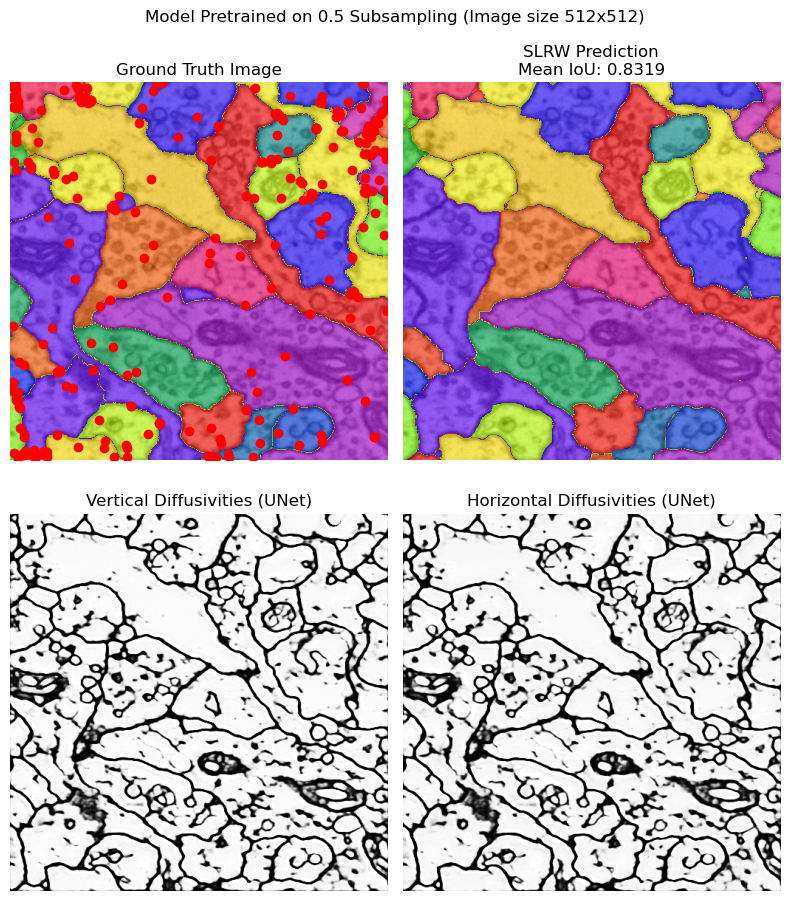

In [3]:
model_path = "checkpoints/models/best_model_subsample_0.5"
model_subsampling_ratio = 0.5
test_pretrained_model(model_path, model_subsampling_ratio, image_size = 512, image_index = 13)

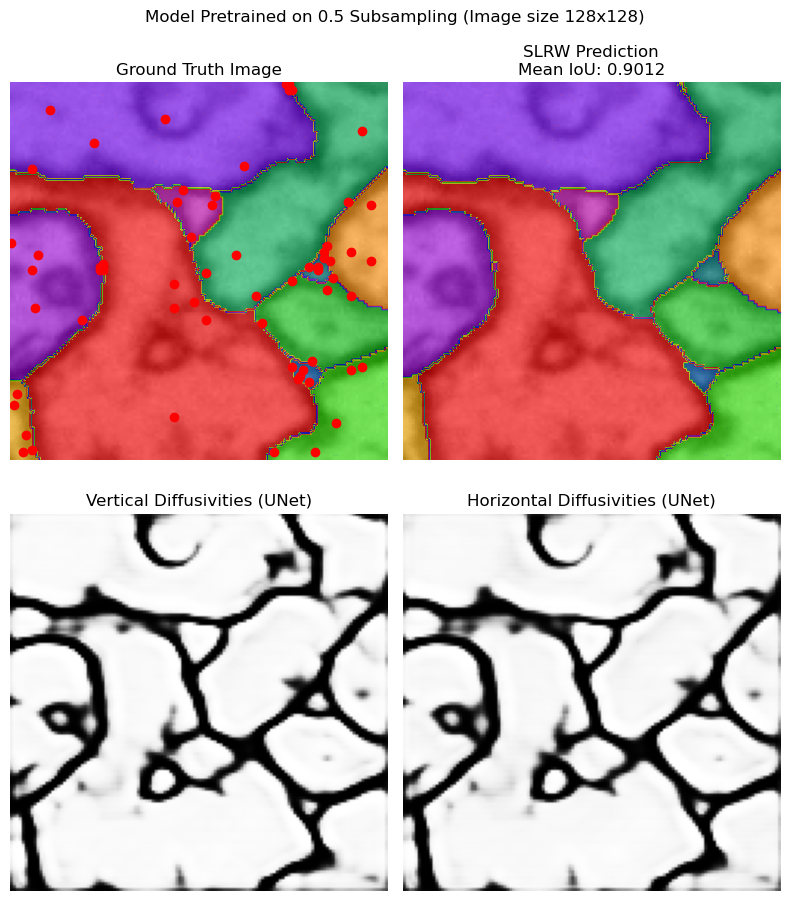

In [4]:
model_path = "checkpoints/models/best_model_subsample_0.5"
model_subsampling_ratio = 0.5
test_pretrained_model(model_path, model_subsampling_ratio, image_size = 128, image_index = 13)

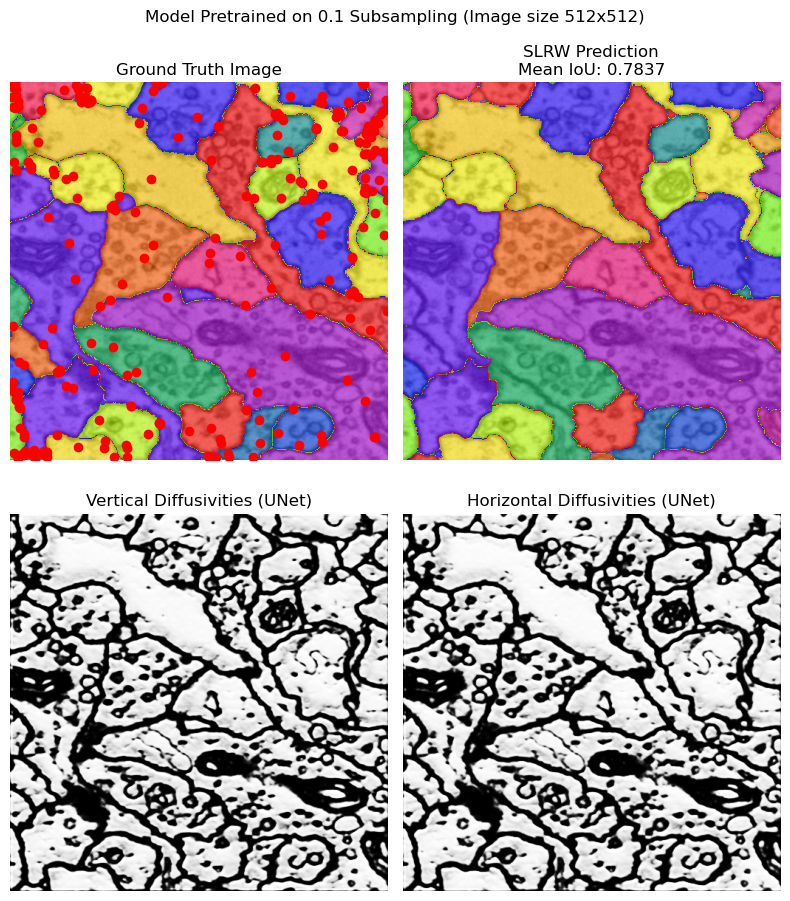

In [5]:
model_path = "checkpoints/models/best_model_subsample_0.1"
model_subsampling_ratio = 0.1
test_pretrained_model(model_path, model_subsampling_ratio, image_size = 512, image_index = 13)

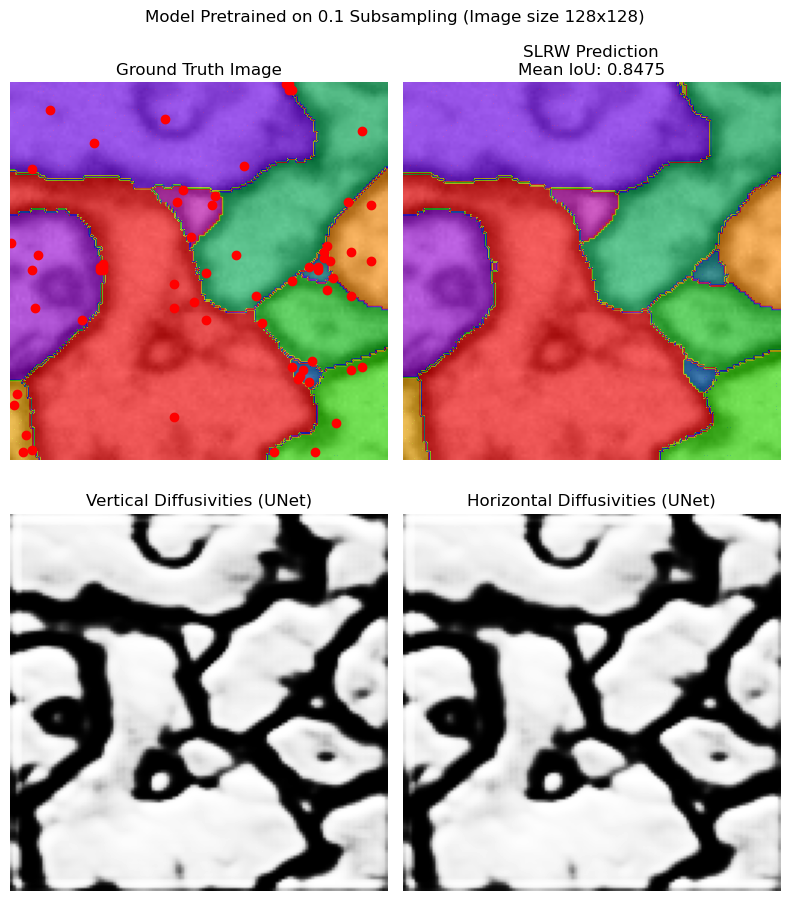

In [6]:
model_path = "checkpoints/models/best_model_subsample_0.1"
model_subsampling_ratio = 0.1
test_pretrained_model(model_path, model_subsampling_ratio, image_size = 128, image_index = 13)

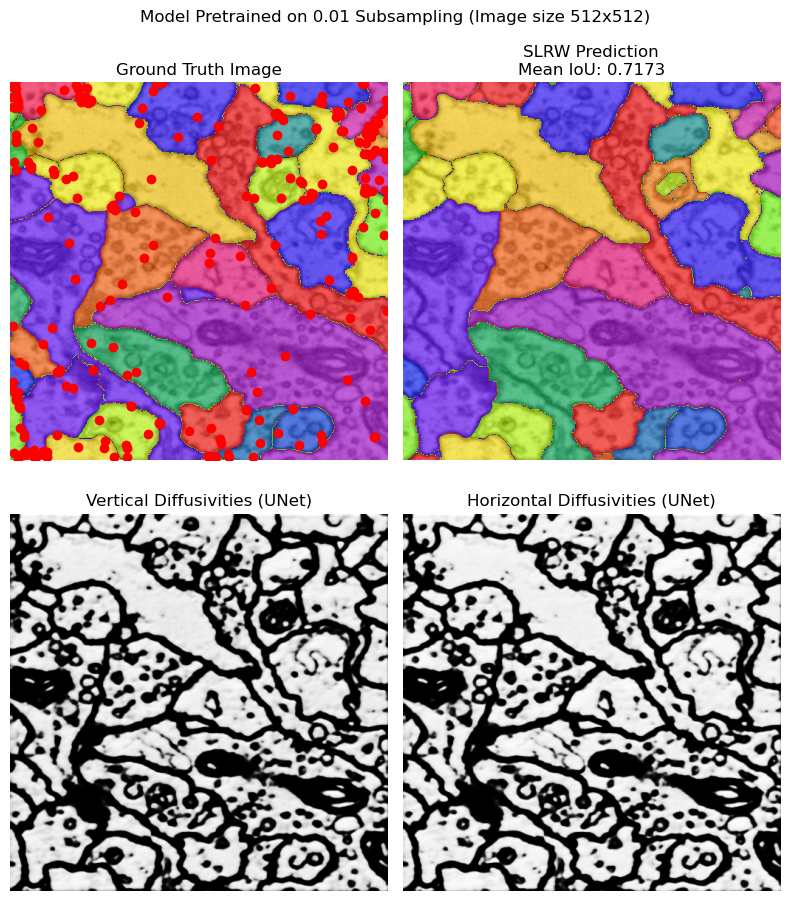

In [7]:
model_path = "checkpoints/models/best_model_subsample_0.01"
model_subsampling_ratio = 0.01
test_pretrained_model(model_path, model_subsampling_ratio, image_size = 512, image_index = 13)

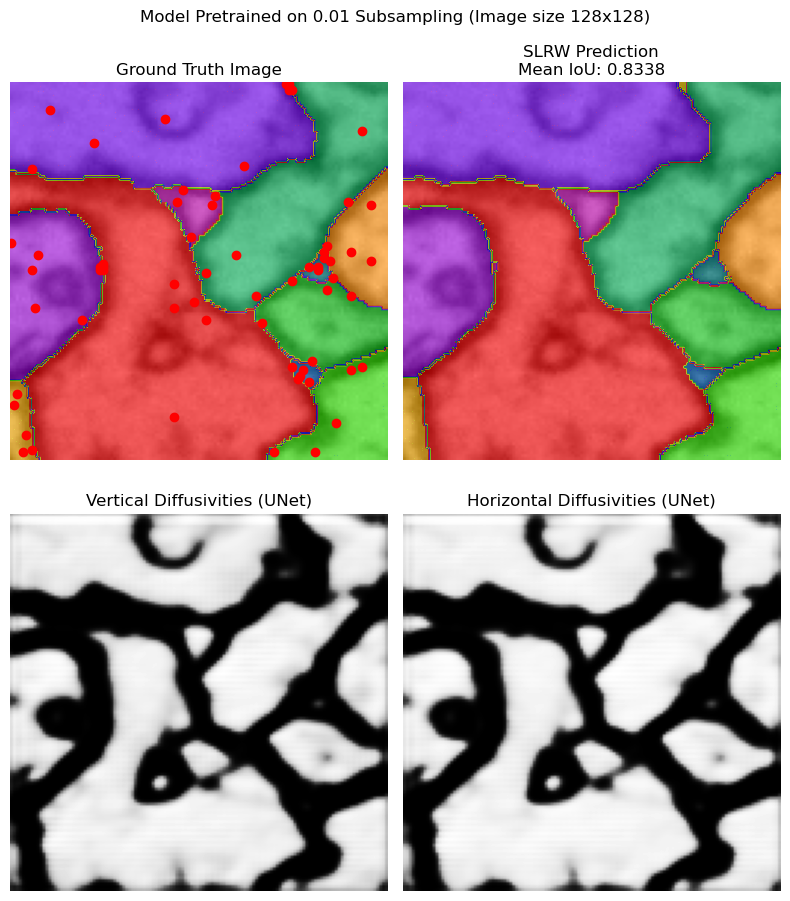

In [8]:
model_path = "checkpoints/models/best_model_subsample_0.01"
model_subsampling_ratio = 0.01
test_pretrained_model(model_path, model_subsampling_ratio, image_size = 128, image_index = 13)

#### Final experiment results:
We tested the models on two resolutions of the test dataset:

| Resolution      | Subsampling Ratio of Pretrain   | Test mIoU |
|----------------|-------------------------|-------------|
| 128x128        |       0.5                | 0.830      |
| 128x128        |       0.1                | 0.789      |
| 128x128        |       0.01                | 0.729    |
| 512x512        |       0.5              | 0.734      |
| 512x512        |       0.1              |  0.682    |
| 512x512        |       0.01              | 0.626      |



Since mIoU averages the IoU of each class, the misclassification of small classes is very harmful for the overall metric. Upon inspection of model predictions, we see very high quality segmentations even when the mIoU is not as high (e.g. 0.8).

# *Conclusion*

Our "Sparse Random Walker" method presents promising results in sparsely seeded image segmentation. 

Our experiments, encompassing both transductive and inductive learning scenarios, confirmed the robustness and adaptability of our method. In transductive experiments, the U-net successfully learned from limited data, showcasing the method's potential in data-scarce environments. The inductive experiments further affirmed our approach's generalizability across multiple images, even when in higher resolution.


Utilizing the CREMI-A dataset, our study proved applicable in practical scenarios like neuron labeling in brain imaging even in the presence of sparse ground truth. 

Our experiments demonstrate that our method achieves precise diffusivity predictions and a high test mIoU, even with very low subsampling ratios. Additionally, increasing the subsampling ratio of the trained network results in marginal improvements in test mIoU even with significant increases in subsampling ratio, underscoring the method's efficiency with minimal data.
